# Data Cleaning and Preparation

### Delete Rows and Columns

In [103]:
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# importeret gennem conda install xlrd (ffs)
import xlrd

# other utilities
from sklearn import datasets, preprocessing, metrics

In [104]:
df = pd.read_excel(r"C:\Users\Rasmus\Desktop\Business Intelligence\Titanic.xls")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [105]:
# see the size
df.shape

(1309, 14)

In [106]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [107]:
# see which are the attribute labels
list(df)

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

In [108]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [109]:
# remove most empty columns, which are not so informative
df = df.drop(['body', 'cabin', 'boat'], axis=1)

In [110]:
#Tjekker om de 3 kolonner (body, cabin, boat) er slettet
df.shape

(1309, 11)

In [111]:
# replace the missing age with the average age
mean_age=df.age.mean()
df['age']= df['age'].fillna(mean_age)

In [112]:
# see the current number of data
df.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1309
sibsp        1309
parch        1309
ticket       1309
fare         1308
embarked     1307
home.dest     745
dtype: int64

In [113]:
# fill the missing home destination with 'NA'
df["home.dest"] = df["home.dest"].fillna("NA")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"


In [114]:
#Det vi har forsøgt indtil videre, er at replace og fjerne alle de missing values, så vi kan arbejde med dataen.

In [115]:
# see the current state of null values
df.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         1
embarked     2
home.dest    0
dtype: int64

In [116]:
# replace the  missing fare values with the average
mean_fare = df.fare.mean()
mean_fare

33.29547928134557

In [117]:
# replace the missing embarked values with the mode
df['embarked']=df['embarked'].fillna('S')

### Transform Categorical Data into Numeric

As a preprocessing, we will convert the strings into integer keys, making it easier for the algorithms to find patterns.

“Female” and “Male” are categorical values and will be converted to 0 and 1 respectively
The “name”, “ticket”, and “home.dest” columns consist of non-categorical string values, which are difficult to use in our algorithm, so we will drop them from the data set

In [118]:
# define a function for transformation
def preprocessor(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df['sex'] = le.fit_transform(df['sex'])
    processed_df['embarked'] = le.fit_transform(df['embarked'])
    processed_df = processed_df.drop(['name','ticket','home.dest'], axis=1)
    return processed_df

In [119]:
# call the transformation function
dfp_ = preprocessor(df)

In [120]:
#Nu tager vi de første 5 kolonner/rækker, for at se om der er sket noget
dfp_.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,2
1,1,1,1,0.9167,1,2,151.5500,2
2,1,0,0,2.0000,1,2,151.5500,2
3,1,0,1,30.0000,1,2,151.5500,2
4,1,0,0,25.0000,1,2,151.5500,2


In [121]:
#Tjekker om vi har droppet 3 korrekt
dfp_.shape

(1309, 8)

In [122]:
dfp =  np.nan_to_num(dfp_)

In [123]:
np.all(np.isfinite(dfp))

True

In [124]:
np.any(np.isnan(dfp))

False

# 3) Analise the cleaning operations you have experienced there, in terms of:

## a. What type of error have been checked for?:

We're undecided between 1 and 2 here:
1. Missing values in different columns. These where identitfyed by:
df.isnull().sum()

2. These columns with high number of missing data in ('body', 'cabin', 'boat') where drop do to being less informativ

## b. Has this type of error been found?
2. High missing values there were found: 'body', 'cabin', and 'boat'.

## c. If it has been found, how it has been recovered?
4. High number of missing values ('body', 'cabin', 'boat') were dropped

## d. Do you suggest any other alternative way of data reparation?
1. 'age' & 'fare' insted of mean could have static value as 0 or have vaule set to null



# 4) Create a table in MS excel:

In [125]:
ett = pd.read_excel(r"C:\Users\Rasmus\Desktop\Business Intelligence\error_table_titanic.xlsx", index_col=None, na_values=['NA'])

In [126]:
ett.head()

,Error Type,Found or Not\n (True/False),Solution Applied,Another Possible Solution
0,Missing 'age',True,Filled with mean age,Insted of mean could have static value as 0 or...
1,Missing 'home.dest',True,Filled with 'NA',An alternativ to 'NA' could be consider imputi...
2,Missing 'fare',True,Filled with mean fare,Insted of mean could have static value as 0 or...
3,Missing 'embarked',True,Filled with mode ('S'),"Only missing 2 null values, mode has to be th..."
4,High missing values,True,"Columns dropped \n('body', 'cabin', 'boat')","Do to high number of missing values, the best ..."


# Data Exploration

In [127]:
# see the types of the attributes
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
embarked      object
home.dest     object
dtype: object

In [128]:
# get some insights of the value scope
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,12.883199,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


## Measures of Central Tendency

In [129]:
# mean
# np.mean(df[['age']])
np.mean(df.age)

29.881134512428297

In [130]:
# the average in groups
df.groupby("pclass")["age"].mean()

pclass
1    38.039569
2    29.528333
3    26.302223
Name: age, dtype: float64

In [131]:
# weighted mean
x=np.average(df.age, weights=df.pclass)

In [132]:
# trimmed mean - ignores the 10% extream values from both ends (deciles)
from scipy import stats as st
st.trim_mean(df.age, 0.1)

29.37868291398345

## Measures of Variability

In [133]:
# standard deviation
df.age.std()

12.883199043445334

In [134]:
# quantiles
df.age.quantile(0.75) - df.age.quantile(0.25)

13.0

In [135]:
# quantiles
df.age.quantile([0.05, 0.25, 0.50, 0.75, 0.95])

0.05     7.400000
0.25    22.000000
0.50    29.881135
0.75    35.000000
0.95    55.000000
Name: age, dtype: float64

## Plotting

### Box Plot

<Axes: >

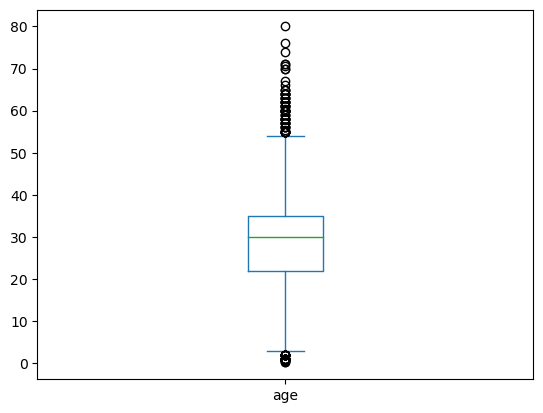

In [136]:
# box plot
# here we see the median25th and 75th percentiles, the range, and the outliers
df.age.plot.box()

<Axes: title={'center': 'age'}, xlabel='embarked'>

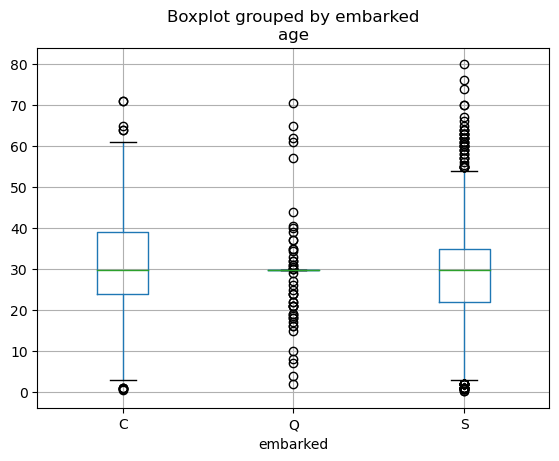

In [137]:
# categorical data vs numeric data
df.boxplot(by='embarked', column='age')

<Axes: ylabel='Frequency'>

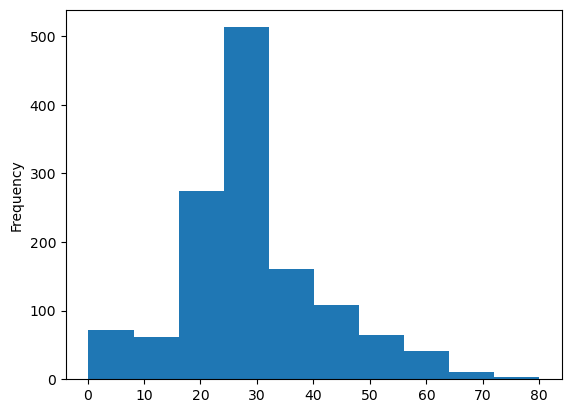

In [138]:
df.age.plot.hist()

### Density Plot

<Axes: ylabel='Density'>

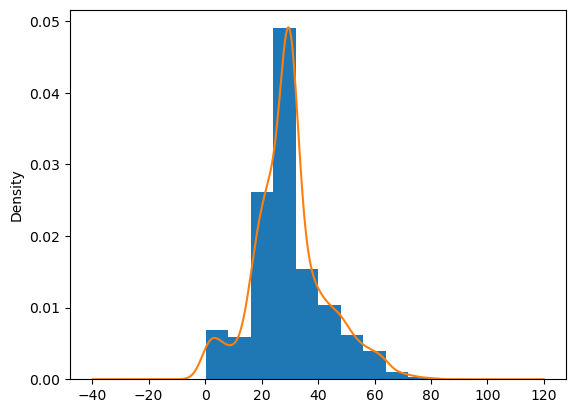

In [139]:
# parameters can control the smoothness
df.age.plot.hist(density=True)
df.age.plot.density()

### Bar Charts

<Axes: xlabel='embarked'>

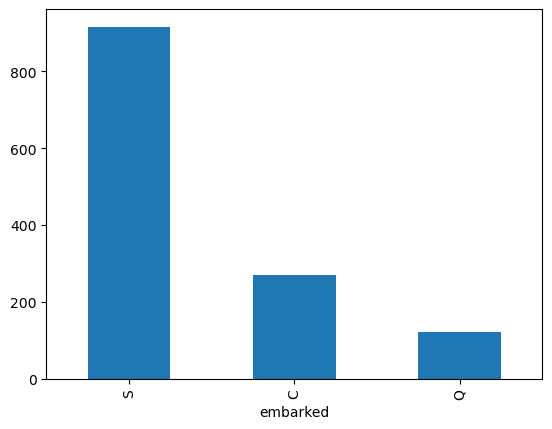

In [140]:
# Non-numeric data is not included in the statistic above, but can be plotted
df['embarked'].value_counts().plot(kind='bar')

<Axes: xlabel='survived'>

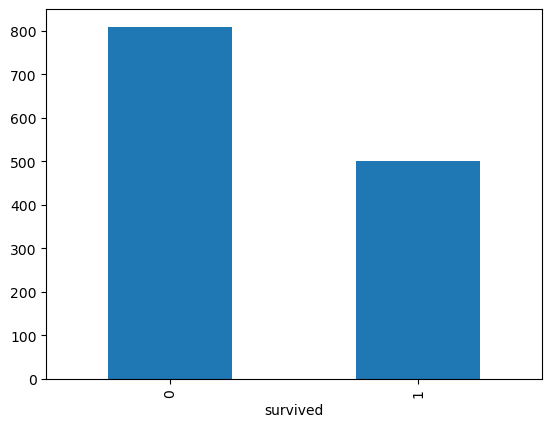

In [141]:
# Numeric data can also be plotted 
df['survived'].value_counts().plot(kind='bar')

### Scatterplot

<Axes: xlabel='fare', ylabel='age'>

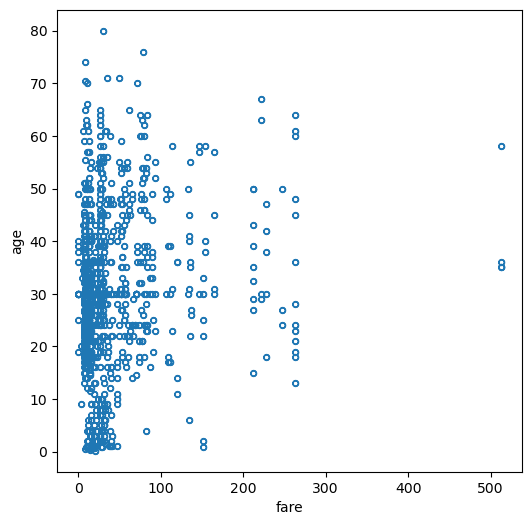

In [142]:
df.plot.scatter(x='fare', y='age', figsize=(6, 6), marker = '$\u25EF$')

<Axes: xlabel='age', ylabel='Density'>

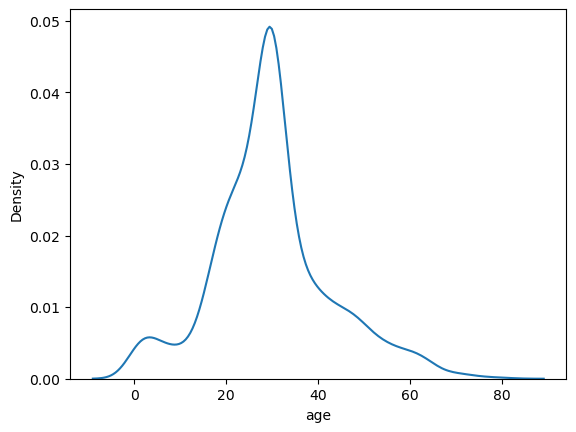

In [143]:
# a topographical map, presents the density of points of two variables
sns.kdeplot(df.age)

### Violin Plot

<Axes: xlabel='embarked', ylabel='age'>

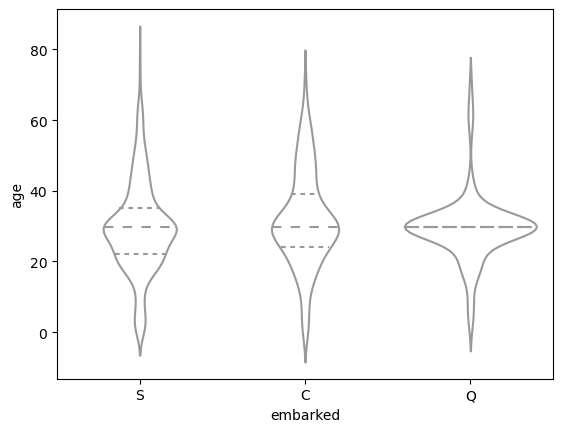

In [144]:
# enhancement to the boxplot
# shows the density estimates
sns.violinplot(df, x=df.embarked, y=df.age, inner="quart", color="white")

# Contour Plot (VIRKER IKKE)

### Correlation

In [145]:
# Correlation matrix
corrmat = df.corr()
corrmat

ValueError: could not convert string to float: 'Allen, Miss. Elisabeth Walton'

In [ ]:
sns.heatmap(corrmat, annot=True)
plt.show()

In [ ]:
# Did the social class matter?
social = df.groupby('pclass').mean()
social

In [ ]:
# plot
social['survived'].plot.bar()

# Further Exploration (VIRKER IKKE)

#### Gender

In [ ]:
# Did the gender matter?
gender = df.groupby('sex').mean()
gender

In [ ]:
# plot
gender['survived'].plot.bar()

In [ ]:
# gender by class
gender_by_class = df.groupby(['pclass','sex']).mean()
gender_by_class

In [ ]:
# plot
gender_by_class['survived'].plot.bar()

# Age

In [146]:
# Did the age matter?
bins = [0,10,20,30,40,50,60,70,80] 
age=df.groupby([(pd.cut(df.age, bins))]).count()
age

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
age,,,,,,,,,,,
"(0, 10]",86,86,86,86,86,86,86,86,86,86,86
"(10, 20]",162,162,162,162,162,162,162,162,162,162,162
"(20, 30]",624,624,624,624,624,624,624,624,624,624,624
"(30, 40]",210,210,210,210,210,210,210,210,210,210,210
"(40, 50]",132,132,132,132,132,132,132,132,132,132,132
"(50, 60]",62,62,62,62,62,62,62,62,62,62,62
"(60, 70]",27,27,27,27,27,27,27,27,26,27,27
"(70, 80]",6,6,6,6,6,6,6,6,6,6,6


In [147]:
# average per range
age_by_gender=df.groupby([(pd.cut(df.age, bins)), 'sex']).mean()
age_by_gender

TypeError: Could not convert Allison, Miss. Helen LoraineBecker, Miss. Marion LouiseCollyer, Miss. Marjorie "Lottie"Harper, Miss. Annie Jessie "Nina"Hart, Miss. Eva MiriamLaroche, Miss. LouiseLaroche, Miss. Simonne Marie Anne AndreeQuick, Miss. Phyllis MayQuick, Miss. Winifred VeraWells, Miss. JoanWest, Miss. Barbara JWest, Miss. Constance MiriumAndersson, Miss. Ebba Iris AlfridaAndersson, Miss. Ellis Anna MariaAndersson, Miss. Ingeborg ConstanziaAsplund, Miss. Lillian GertrudBaclini, Miss. EugenieBaclini, Miss. Helene BarbaraBaclini, Miss. Marie CatherineBoulos, Miss. NourelainDean, Miss. Elizabeth Gladys "Millvina"Emanuel, Miss. Virginia EthelFord, Miss. Robina Maggie "Ruby"Goodwin, Miss. Jessie AllisHirvonen, Miss. Hildur EJohnson, Miss. Eleanor IleenKarun, Miss. MancaKink-Heilmann, Miss. Luise GretchenKlasen, Miss. Gertrud EmiliaNakid, Miss. Maria ("Mary")Palsson, Miss. Stina ViolaPalsson, Miss. Torborg DaniraPeacock, Miss. TreasteallRosblom, Miss. Salli HelenaSandstrom, Miss. Beatrice IreneSandstrom, Miss. Marguerite RutSkoog, Miss. MabelSkoog, Miss. Margit ElizabethStrom, Miss. Telma MatildaTouma, Miss. Maria YoussefVan Impe, Miss. Catharina to numeric

In [ ]:
# plot
age_by_gender['survived'].plot.bar()

# Train a model

#### 1. Split the data into input and output
#### 2. Split the data into train and test sets

In [148]:
nd_to_df = pd.DataFrame(dfp, columns=dfp_.columns)

In [149]:
# Split the data into input and output

X = nd_to_df.drop(['survived'], axis=1).values
y = nd_to_df['survived'].values

In [150]:
X[-1]

array([ 3.   ,  1.   , 29.   ,  0.   ,  0.   ,  7.875,  2.   ])

In [151]:
y

array([1., 1., 0., ..., 0., 0., 0.])

In [152]:
# Split the data into train and test sets
# 80% of the dataset will be used for training and 20% will be used for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [153]:
# Select a method
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=3)

In [154]:
# Train a model
dt.fit (X_train, y_train)

DecisionTreeClassifier(max_depth=3)

#### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.???

In [155]:
# Validate the model
dt.score (X_test, y_test)

0.816793893129771

##### The resulting value is the model accuracy. It means that the model correctly predicted the survival of this % of the test set. Not bad for start!

In [156]:
# Try another method
import sklearn.ensemble as ske
rf = ske.RandomForestClassifier(n_estimators=50)
rf.fit (X_train, y_train)
rf.score (X_test, y_test)

0.7557251908396947

In [158]:
# Try another method
import sklearn.ensemble as ske
gb = ske.GradientBoostingClassifier(n_estimators=50)
gb.fit (X_train, y_train)
gb.score (X_test, y_test)

0.7862595419847328

In [159]:
# Try another method
import sklearn.ensemble as ske
# from utilities import visualize_classifier
eclf = ske.VotingClassifier([('dt', dt), ('rf', rf), ('gb', gb)])
eclf.fit (X_train, y_train)
eclf.score (X_test, y_test)

0.7938931297709924

### Use the model to predict
Once the model is trained we can use it to predict the survival of passengers in the test data set, and compare these to the known survival of each passenger using the original dataset.

In [160]:
# Test the classifier with the test input data
prediction = eclf.predict(X_test)
prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0.

In [161]:
# Evaluate classifier performance
from sklearn.metrics import classification_report
class_names = ['Non-survival', 'Survival']
print("\n" + "#"*40)

print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, eclf.predict(X_train), target_names=class_names))
print("#"*40 + "\n")

print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, prediction, target_names=class_names))


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

Non-survival       0.86      0.94      0.90       646
    Survival       0.88      0.76      0.82       401

    accuracy                           0.87      1047
   macro avg       0.87      0.85      0.86      1047
weighted avg       0.87      0.87      0.87      1047

########################################


Classifier performance on test dataset

              precision    recall  f1-score   support

Non-survival       0.81      0.88      0.84       163
    Survival       0.76      0.66      0.71        99

    accuracy                           0.79       262
   macro avg       0.79      0.77      0.77       262
weighted avg       0.79      0.79      0.79       262



In [162]:
prediction = eclf.predict(X_test)
prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0.

In [163]:
list(X_test)

[array([ 3.   ,  1.   ,  2.   ,  4.   ,  1.   , 29.125,  1.   ]),
 array([ 2.        ,  1.        , 29.88113451,  0.        ,  0.        ,
        12.875     ,  2.        ]),
 array([ 1.  ,  1.  , 51.  ,  0.  ,  0.  , 26.55,  2.  ]),
 array([ 3.        ,  0.        , 29.88113451,  3.        ,  1.        ,
        25.4667    ,  2.        ]),
 array([ 1.    ,  1.    , 54.    ,  1.    ,  0.    , 55.4417,  0.    ]),
 array([ 1. ,  1. , 32. ,  0. ,  0. , 30.5,  0. ]),
 array([ 3.    ,  0.    , 45.    ,  1.    ,  0.    , 14.1083,  2.    ]),
 array([ 3.    ,  1.    , 34.    ,  0.    ,  0.    ,  6.4958,  2.    ]),
 array([ 1.,  1., 40.,  0.,  0.,  0.,  2.]),
 array([ 3.    ,  1.    , 27.    ,  0.    ,  0.    ,  7.7958,  2.    ]),
 array([ 3.        ,  1.        , 29.88113451,  0.        ,  0.        ,
         7.75      ,  1.        ]),
 array([ 1. ,  0. , 30. ,  0. ,  0. , 93.5,  2. ]),
 array([ 1. ,  1. , 55. ,  0. ,  0. , 30.5,  2. ]),
 array([ 3.   ,  0.   , 20.   ,  1.   ,  0.   ,  9.825,

In [164]:
# Enter a new data set for a person
my_set1 = ([[1,0,29.00,0,0,211.3375,0]])
# my_set2 = ([[3.    ,   1.    ,  29.    , 0,   0.    ,   7.875 ,   0.   ]])
# my_set3 = ([[3.    ,   1.    ,  29.    , 0,   0.    ,   7.875 ,   0.   ]])

In [165]:
prediction = eclf.predict(my_set1)
prediction

array([1.])